In [122]:
from matplotlib import pyplot as plt
import numpy as np

from umklapp_qw import UmklappQW
from potential_builders import get_simple_V0, get_step_V, get_smeared_V
from util import normalize, plot_x

In [65]:
def get_ck(psi, sign):
    ck = []
    for n in range(-L, L):
        psi_k = normalize(qw.free_eigenfun(sign=sign, k=np.pi/L*n))
        ck.append(psi.T.conj() @ psi_k)
    return np.array(ck)
    
def decompose_in_k(psi, k0):
    ck_plus = get_ck(psi, sign=1)
    ck_minus = get_ck(psi, sign=-1)
    norm = sum(np.abs(ck_plus)**2) + sum(np.abs(ck_minus)**2)
    assert abs(norm-1) < 1e-3, norm
    plt.xlabel('k')
    plt.ylabel(r'$\vert{c_k}\vert^2$')
    plt.title('Mode decomposition')
    plt.xticks([k0, k0-np.pi, -k0, -k0+np.pi], [r'$k_0$', r'$k_0-\pi$', r'$-k_0$', r'$\pi-k_0$'])
    p = plt.plot(np.arange(-L, L)*np.pi/L, np.abs(ck_plus)**2+np.abs(ck_minus)**2)
    return p

# Umklapp QW

We consider a quantum walk with walk operator
$$
W = \frac{1}{2}\begin{pmatrix}
T^2 -\mathbb{I} & i(T+T^\dagger)\\
i(T+T^{\dagger}) & (T^\dagger)^{2}-\mathbb{I}
\end{pmatrix}\,.
$$
The dispersion relation is $\omega_\pm = \pm \arccos(-\sin{p}^2)$.

## Decomposition in LC plates

In the lab, they can implement
$$
L(\delta, \alpha)\equiv \int dp 
\begin{pmatrix}
\cos(\delta/2) & i\sin(\delta/2)e^{-2i\alpha(p)}\\
i\sin(\delta/2)e^{2i\alpha(p)} & \cos(\delta/2)
\end{pmatrix}\otimes\lvert{p}\rangle\langle{p}\rvert\,,
$$
where $p$ is the momentum of the walker. We can generate $W$ as the product of two LC plates, $W=L_1L_2$, where
$$
L_1=L(\pi/4, p/2)=\begin{pmatrix}
1 & iT\\
iT^\dagger & 1
\end{pmatrix}\,, \quad L_2=L(\pi/4, -p/2)=\begin{pmatrix}
1 & iT^\dagger\\
iT & 1
\end{pmatrix}\,.
$$

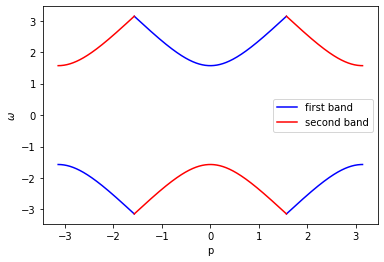

In [56]:
p0 = np.linspace(-np.pi/2, np.pi/2, 500)
p1 = np.linspace(-np.pi, -np.pi/2, 250)
p2 = np.linspace(np.pi/2, np.pi, 250)
plt.plot(p0, np.arccos(-np.sin(p0)**2), 'b', label='first band')
plt.plot(p1, -np.arccos(-np.sin(p1)**2), 'b')
plt.plot(p2, -np.arccos(-np.sin(p2)**2), 'b')
plt.plot(p0, -np.arccos(-np.sin(p0)**2), 'r', label='second band')
plt.plot(p1, np.arccos(-np.sin(p1)**2), 'r')
plt.plot(p2, np.arccos(-np.sin(p2)**2), 'r')
plt.xlabel('p')
plt.ylabel(r'$\omega$')
plt.legend()
plt.show()

### Free Theory

In [107]:
L = 300
qw = UmklappQW(L=L)

In [108]:
k0 = np.pi/4
sigma_k = 0.1
x0 = -100
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))

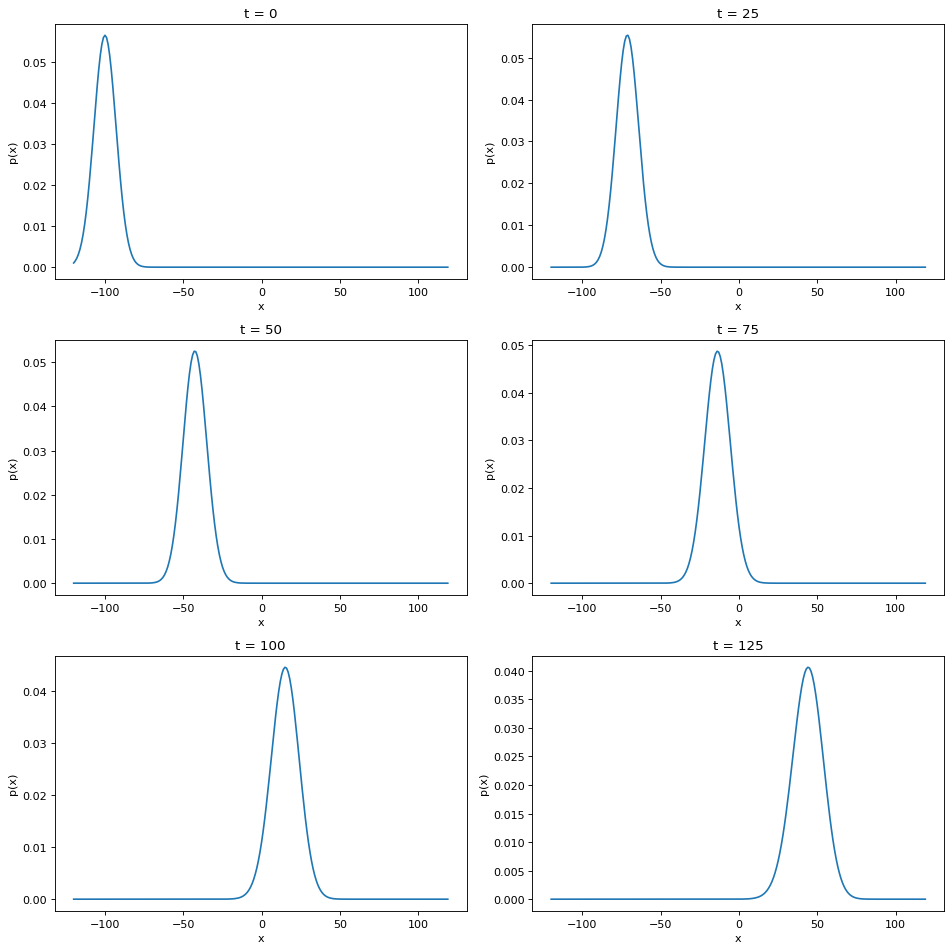

In [59]:
steps = 5
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
plot_x(qw, -120, 120)
plt.title(f't = 0')
for i in range(steps):
    qw.evolve(25)
    fig.add_subplot(3, 2, i+2)
    plot_x(qw, -120, 120)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

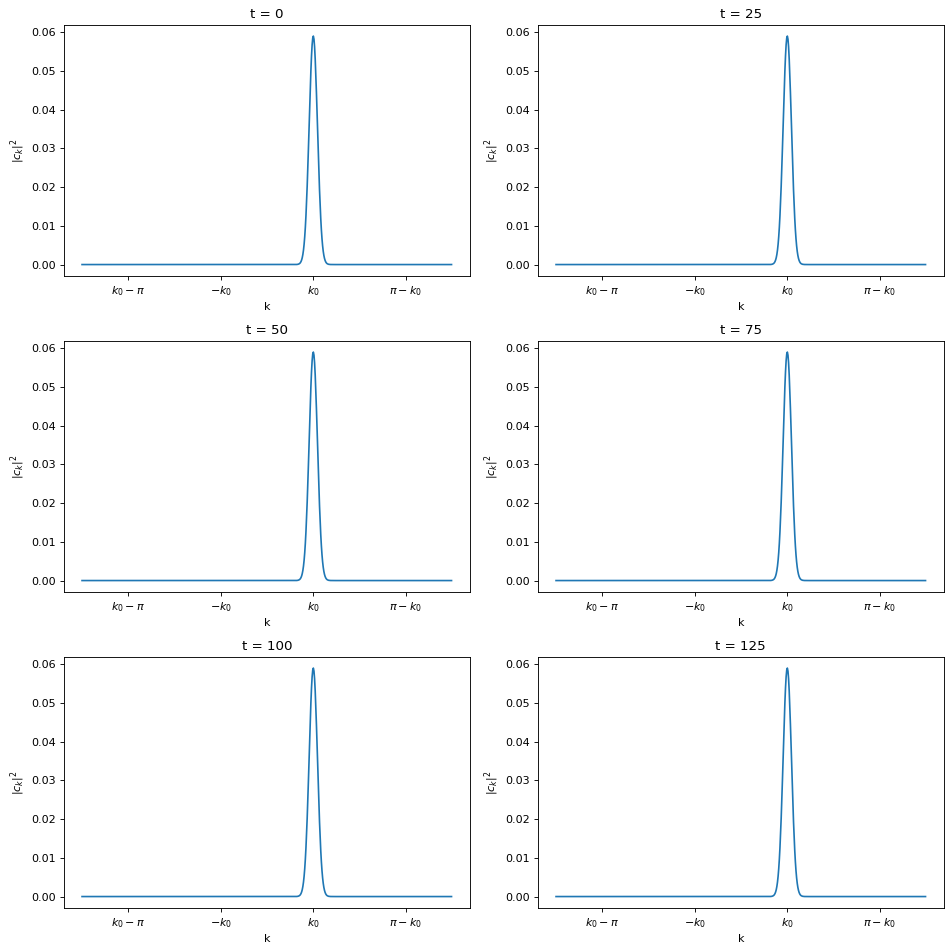

In [60]:
k0 = np.pi/4
sigma_k = 0.1
x0 = -100
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
decompose_in_k(qw.psi, k0)
plt.title(f't = 0')
steps = 5
for i in range(steps):
    qw.evolve(25)
    fig.add_subplot(3, 2, i+2)
    decompose_in_k(qw.psi, k0)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

### Delta Potential

In [127]:
gamma = np.pi/2
phi = np.pi/4
V0 = get_simple_V0(phi, gamma)
V = get_step_V(L=L, V0=V0, a=0, b=0)
qw = UmklappQW(L=L, V=V)

In [128]:
k0 = np.pi/4
sigma_k = 0.1
x0 = -100
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))

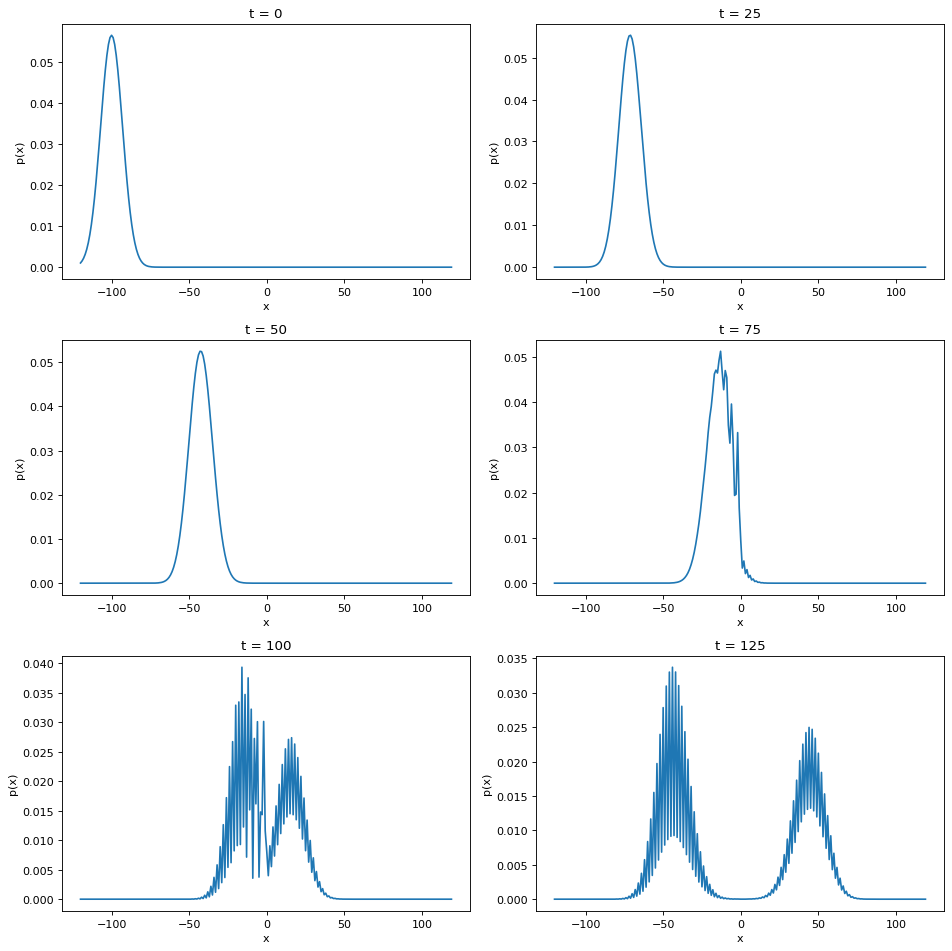

In [129]:
steps = 5
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
plot_x(qw, -120, 120)
plt.title(f't = 0')
for i in range(steps):
    qw.evolve(25)
    fig.add_subplot(3, 2, i+2)
    plot_x(qw, -120, 120)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

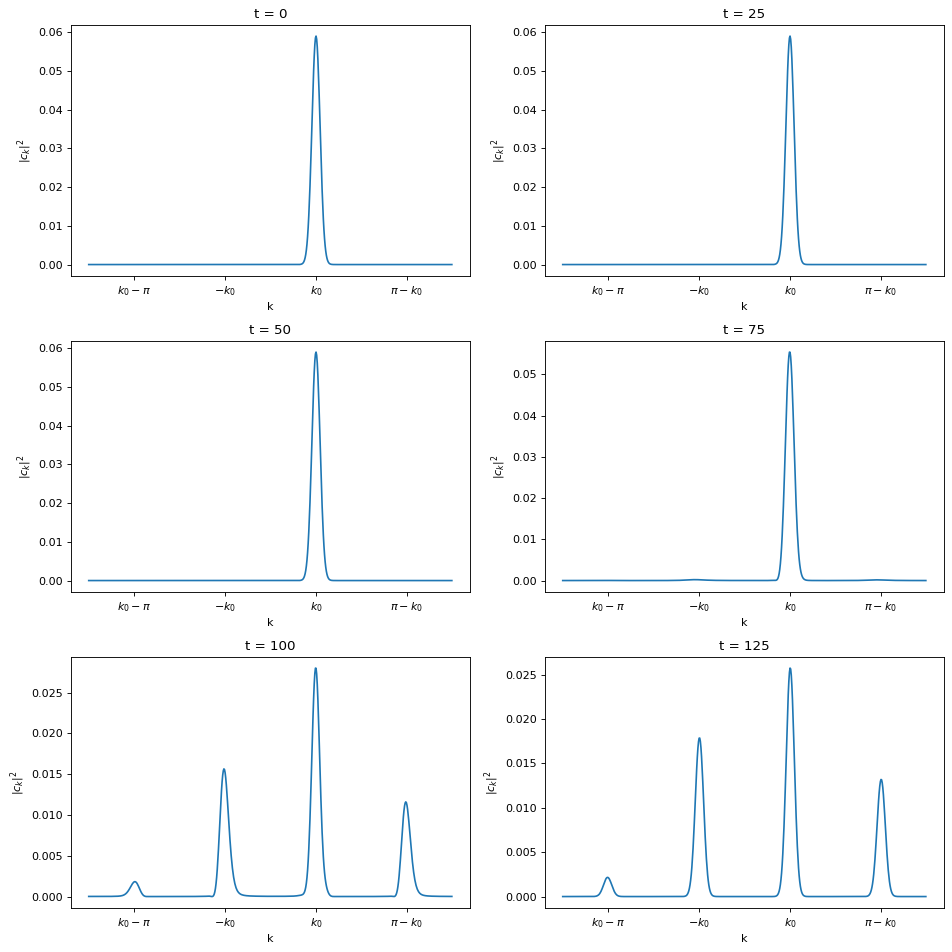

In [130]:
k0 = np.pi/4
sigma_k = 0.1
x0 = -100
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
decompose_in_k(qw.psi, k0)
plt.title(f't = 0')
steps = 5
for i in range(steps):
    qw.evolve(25)
    fig.add_subplot(3, 2, i+2)
    decompose_in_k(qw.psi, k0)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

### Step Potential

In [124]:
gamma = np.pi/2
phi = np.pi/4
vx = 10
V0 = get_simple_V0(phi, gamma)
V = get_step_V(L=L, V0=V0, a=-vx, b=vx-1)
qw = UmklappQW(L=L, V=V)

In [125]:
k0 = np.pi/4
sigma_k = 0.1
x0 = -100
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))

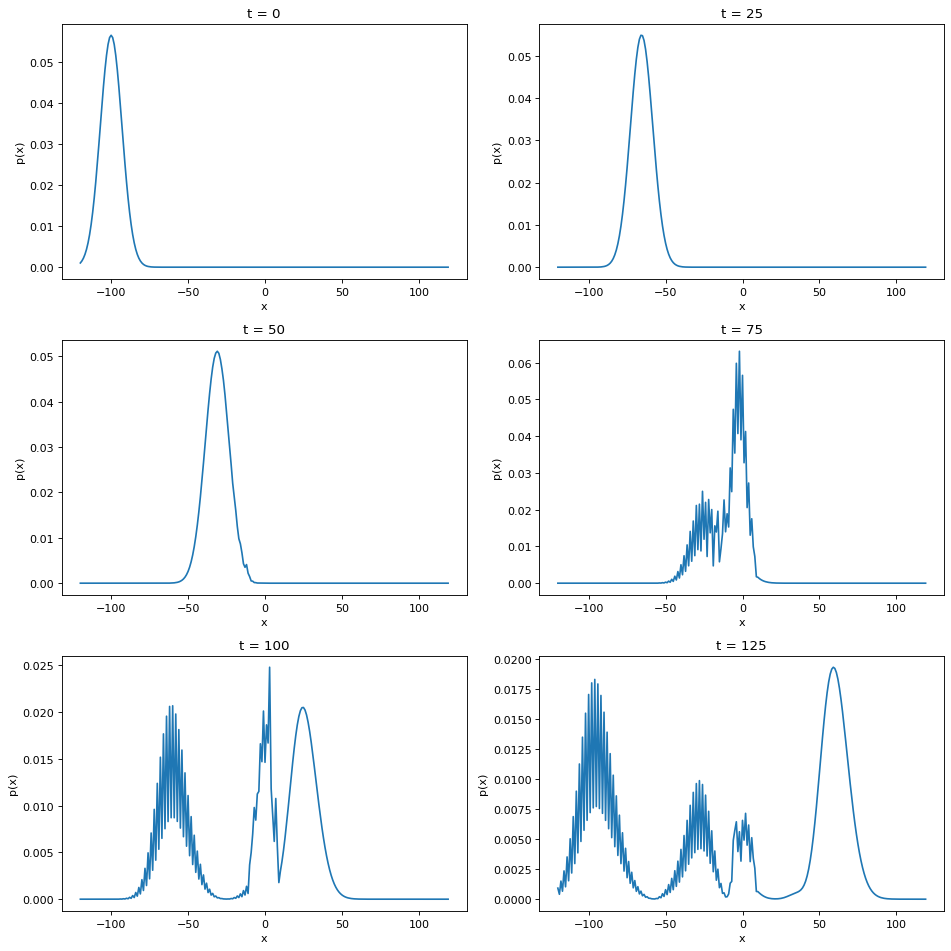

In [126]:
steps = 5
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
plot_x(qw, -120, 120)
plt.title(f't = 0')
for i in range(steps):
    qw.evolve(30)
    fig.add_subplot(3, 2, i+2)
    plot_x(qw, -120, 120)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

### Smeared Potential

In [150]:
gamma = np.pi/4
phi = np.pi/4
sigma_V = 4
V = get_smeared_V(L=L, phi=phi, gamma=gamma, sigma_V=sigma_V)
qw = UmklappQW(L=L, V=V)

In [154]:
k0 = np.pi/4
sigma_k = 0.1
x0 = -100
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))

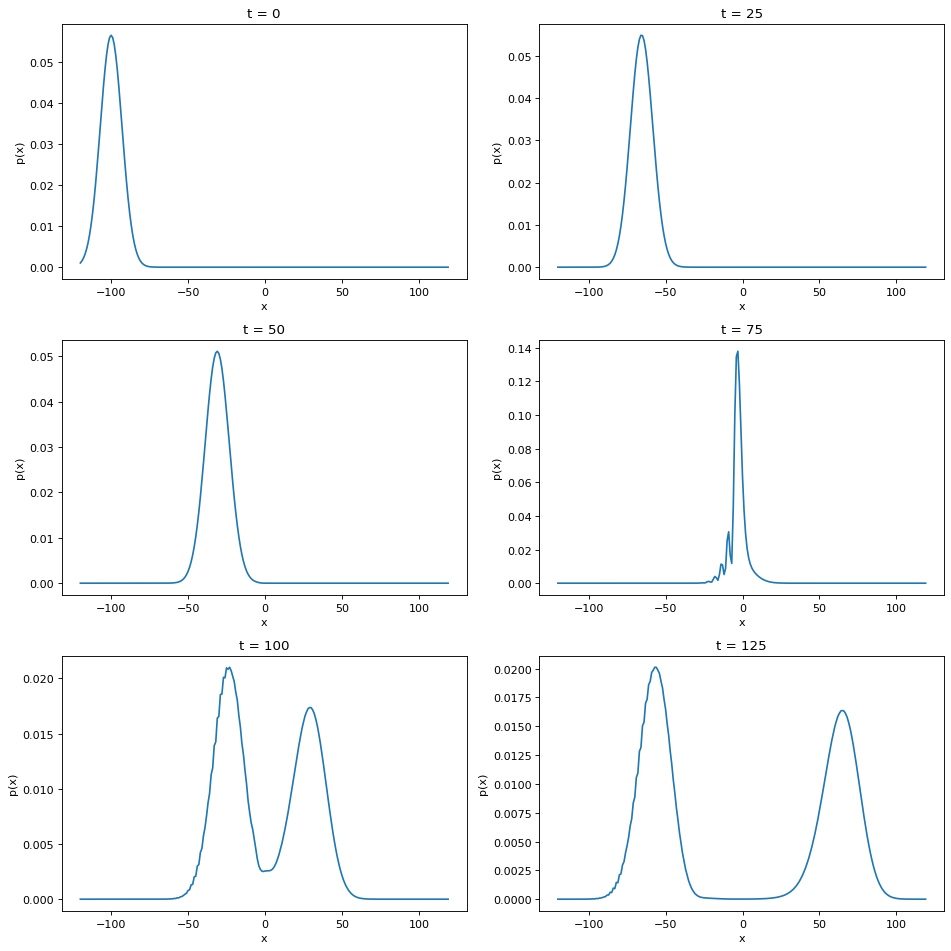

In [155]:
steps = 5
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
plot_x(qw, -120, 120)
plt.title(f't = 0')
for i in range(steps):
    qw.evolve(30)
    fig.add_subplot(3, 2, i+2)
    plot_x(qw, -120, 120)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()

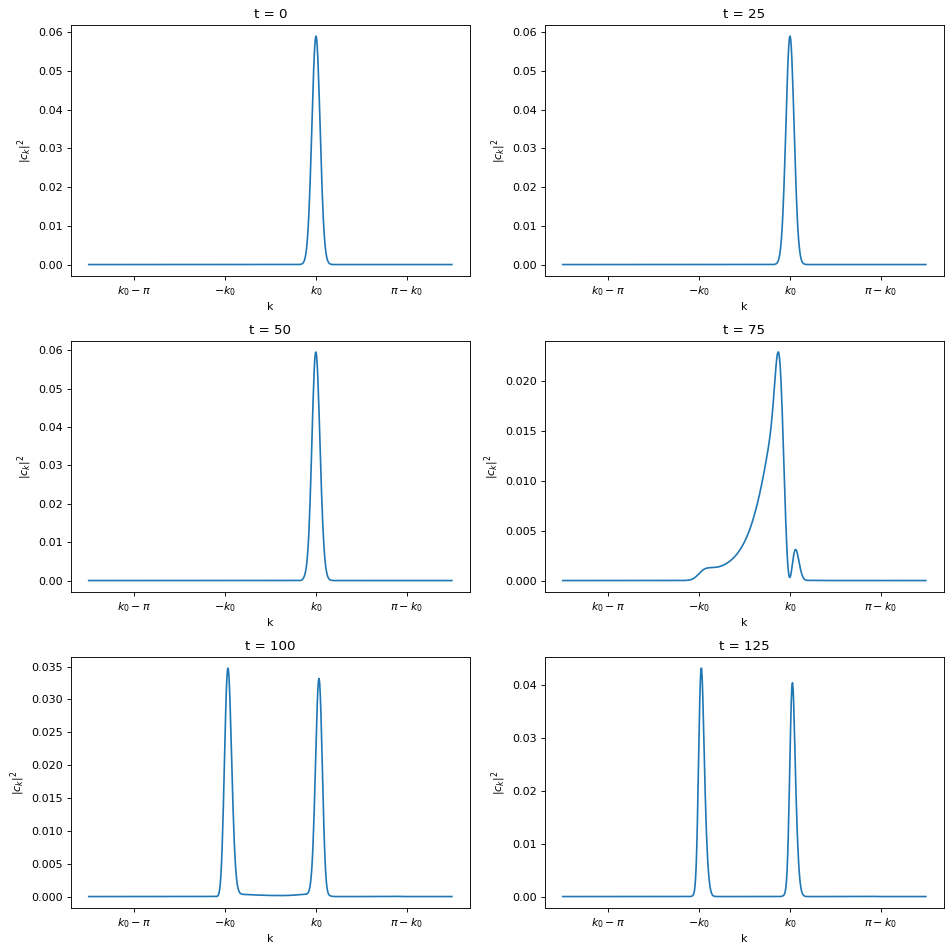

In [157]:
k0 = np.pi/4
sigma_k = 0.1
x0 = -100
qw.psi = normalize(qw.wave_packet(k0=k0, sigma_k=sigma_k, x0=x0, sign=1))
fig = plt.figure(figsize=(12, 12), dpi=80)
fig.add_subplot(3, 2, 1)
decompose_in_k(qw.psi, k0)
plt.title(f't = 0')
steps = 5
for i in range(steps):
    qw.evolve(30)
    fig.add_subplot(3, 2, i+2)
    decompose_in_k(qw.psi, k0)
    plt.title(f't = {25*(i+1)}')
fig.tight_layout()
plt.show()